In [1]:
import pandas as pd
df = pd.read_csv('3dni_pogoda.csv')
df.index = df['Data czas']
df.drop(columns='Data czas', inplace = True)
df.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),...,Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t),Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,,,,,,,,,,,,,,
2016-01-04,4065.480609,-3.691304,3.260870,78.565217,7.304348,4699.010000,-9.341667,4.416667,70.083333,1.416667,...,68.458333,0.041667,5232.324750,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,4699.010000,-9.341667,4.416667,70.083333,1.416667,5123.421500,-11.200000,3.708333,68.458333,0.041667,...,55.125000,0.000000,5489.413208,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0
2016-01-06,5123.421500,-11.200000,3.708333,68.458333,0.041667,5232.324750,-9.908333,3.750000,55.125000,0.000000,...,61.916667,1.333333,5661.893417,-11.320833,1.583333,77.583333,0.125000,7.583,5.0,4.0
2016-01-07,5232.324750,-9.908333,3.750000,55.125000,0.000000,5489.413208,-10.616667,1.916667,61.916667,1.333333,...,77.583333,0.125000,5415.852458,-7.220833,2.791667,69.541667,5.916667,7.600,1.0,4.0
2016-01-08,5489.413208,-10.616667,1.916667,61.916667,1.333333,5661.893417,-11.320833,1.583333,77.583333,0.125000,...,69.541667,5.916667,4732.605458,-1.837500,3.916667,90.416667,7.958333,7.650,2.0,4.0


In [2]:
X = df.drop('Energia(t)', axis=1)
y = df['Energia(t)']

In [3]:
X_train, X_test, y_train, y_test = X[:'2017-10-01'], X['2017-10-01':] ,y[:'2017-10-01'] ,y['2017-10-01':]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neural_network import MLPRegressor


mlp = MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                   shuffle=False, early_stopping=True,
                  activation='relu')
mlp.fit(X_train,y_train)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
y_pred = mlp.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean squered error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root mean squered error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2 score: 0.6181703680036228
Mean squered error: 175494.3719377037
Root mean squered error: 418.92048402734343


In [9]:
from pandas import Series

y_pred_df = pd.DataFrame(data=y_pred, index=X['2017-10-01':].index.values)

In [10]:
y_pred_df.index = pd.to_datetime(y_pred_df.index)

In [11]:
df.index = pd.to_datetime(df.index)

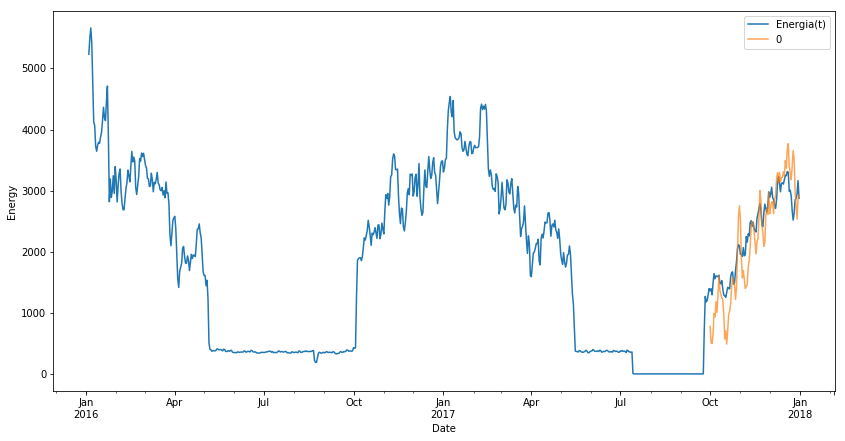

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

ax = df['Energia(t)'].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()